In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
file = r"C:/Users/admin/Desktop/PM/Project/For_modeling.csv"
project = pd.read_csv(file)
sns.set({"figure.figsize":(10,10)})

In [3]:
print(project.head())

   Unnamed: 0  Duration  Distance      PLong       PLatd      DLong  \
0           0         3        50  37.544666  126.888359  37.544666   
1           1        24      7670  37.506199  127.003944  37.551250   
2           2         8      1390  37.544590  127.057083  37.537014   
3           3         8      1820  37.571102  127.023560  37.561447   
4           4         4       850  37.573242  127.015907  37.565849   

        DLatd  Haversine  Pmonth  Pday  ...  Dmin  DDweek  Temp  Precip  Wind  \
0  126.888359   0.000000       1     1  ...     4       0  -3.2     0.0   0.5   
1  127.035103   5.713529       1     1  ...    25       0  -3.2     0.0   0.5   
2  127.061096   0.913702       1     1  ...     9       0  -3.2     0.0   0.5   
3  127.034920   1.468027       1     1  ...    10       0  -3.2     0.0   0.5   
4  127.016403   0.823227       1     1  ...     6       0  -3.2     0.0   0.5   

   Humid  Solar  Snow  GroundTemp  Dust  
0   40.0    0.0   0.0        -2.2  25.0  
1 

In [4]:
project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Duration    int64  
 2   Distance    int64  
 3   PLong       float64
 4   PLatd       float64
 5   DLong       float64
 6   DLatd       float64
 7   Haversine   float64
 8   Pmonth      int64  
 9   Pday        int64  
 10  Phour       int64  
 11  Pmin        int64  
 12  PDweek      int64  
 13  Dmonth      int64  
 14  Dday        int64  
 15  Dhour       int64  
 16  Dmin        int64  
 17  DDweek      int64  
 18  Temp        float64
 19  Precip      float64
 20  Wind        float64
 21  Humid       float64
 22  Solar       float64
 23  Snow        float64
 24  GroundTemp  float64
 25  Dust        float64
dtypes: float64(13), int64(13)
memory usage: 1.9 GB


In [5]:
for i in project.columns:
    if project[i].isnull().sum() > 0:
        print(i)
else:
    print("There are no missing values")

There are no missing values


In [6]:
project.describe()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,4.923152e+06,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.841734e+06,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,2.466320e+06,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,4.921318e+06,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,7.389176e+06,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,9.830310e+06,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [7]:
project.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

In [8]:
del project["Unnamed: 0"]

In [9]:
project.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [10]:
len(project.index)

9601139

In [11]:
project = project.loc[:250000,:]

In [12]:
project.corr()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
Duration,1.000000,0.662564,-0.021973,0.017557,-0.021503,0.017700,0.364202,0.037889,-0.002267,0.070037,...,-0.007923,0.058628,0.142664,0.000219,0.054026,-0.111570,0.156320,-0.035342,0.179185,0.068343
Distance,0.662564,1.000000,-0.032443,-0.001575,-0.035959,0.001009,0.637301,0.042314,-0.012800,0.036205,...,0.002464,0.060744,0.120645,-0.003634,0.011710,-0.068532,0.084543,-0.045491,0.128096,0.040952
PLong,-0.021973,-0.032443,1.000000,0.082276,0.939200,0.084961,-0.012362,-0.000202,-0.001005,-0.013003,...,-0.001919,0.015332,0.006560,-0.006028,0.002330,-0.007614,0.023493,-0.018376,0.014094,0.019072
PLatd,0.017557,-0.001575,0.082276,1.000000,0.085424,0.969464,0.004531,0.002397,0.002610,-0.000942,...,-0.002025,0.015463,0.012982,-0.010236,-0.004147,-0.008963,0.008357,-0.008489,0.012768,0.009194
DLong,-0.021503,-0.035959,0.939200,0.085424,1.000000,0.086256,-0.021150,-0.000541,0.000196,-0.004130,...,-0.003534,0.015240,0.009017,-0.006412,0.004004,-0.008865,0.021148,-0.018183,0.016049,0.018185
DLatd,0.017700,0.001009,0.084961,0.969464,0.086256,1.000000,0.007879,0.003140,0.001832,0.003393,...,-0.002351,0.015711,0.014006,-0.009373,-0.001350,-0.010141,0.009178,-0.008925,0.014497,0.008967
Haversine,0.364202,0.637301,-0.012362,0.004531,-0.021150,0.007879,1.000000,0.025421,-0.018055,-0.021253,...,0.005914,0.028855,0.046629,0.002008,-0.025231,0.004178,-0.019976,-0.027126,0.028085,0.001063
Pmonth,0.037889,0.042314,-0.000202,0.002397,-0.000541,0.003140,0.025421,1.000000,-0.257478,0.018132,...,-0.005711,0.031296,0.038490,-0.033744,0.222781,-0.172766,0.283835,-0.140473,0.062530,-0.050715
Pday,-0.002267,-0.012800,-0.001005,0.002610,0.000196,0.001832,-0.018055,-0.257478,1.000000,-0.008084,...,0.001903,-0.013328,-0.004955,0.043449,0.023362,0.024461,-0.033188,0.305770,0.008754,0.131444
Phour,0.070037,0.036205,-0.013003,-0.000942,-0.004130,0.003393,-0.021253,0.018132,-0.008084,1.000000,...,-0.028356,0.011927,0.218347,0.026979,0.206130,-0.206156,0.025339,-0.058273,0.260701,-0.118155


In [13]:
#features with high correlation with one another to handle multicollinearity
list_corr = []
for i in project.corr().index:
    for j in project.corr().columns:
        if i == j:
            continue
        else:
            if abs(project.corr()[i][j]) > 0.6:
                list_corr.append([i,j])
                
list_corr_copy = list_corr.copy()
for i in list_corr_copy:
    if i[::-1] in list_corr:
        list_corr.remove(i)

In [14]:
# List of highly correlated features
list_corr

[['Distance', 'Duration'],
 ['DLong', 'PLong'],
 ['DLatd', 'PLatd'],
 ['Haversine', 'Distance'],
 ['Dmonth', 'Pmonth'],
 ['Dday', 'Pday'],
 ['Dhour', 'Phour'],
 ['DDweek', 'PDweek'],
 ['GroundTemp', 'Temp']]

In [15]:
#Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mod = MinMaxScaler()
scaled = mod.fit_transform(project)
train_scaled = pd.DataFrame(scaled, columns = [i for i in project.columns])

In [16]:
train_scaled.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0.008547,0.001202,0.411259,0.236826,0.411259,0.236826,0.000000,0.0,0.0,0.0,...,0.067797,0.0,0.550943,0.0,0.074627,0.317073,0.0,0.0,0.530233,0.13253
1,0.188034,0.230168,0.255130,0.541789,0.437982,0.624000,0.267951,0.0,0.0,0.0,...,0.423729,0.0,0.550943,0.0,0.074627,0.317073,0.0,0.0,0.530233,0.13253
2,0.051282,0.041466,0.410951,0.681992,0.380201,0.692580,0.042851,0.0,0.0,0.0,...,0.152542,0.0,0.550943,0.0,0.074627,0.317073,0.0,0.0,0.530233,0.13253
3,0.051282,0.054387,0.518557,0.593544,0.479369,0.623517,0.068847,0.0,0.0,0.0,...,0.169492,0.0,0.550943,0.0,0.074627,0.317073,0.0,0.0,0.530233,0.13253
4,0.017094,0.025240,0.527242,0.573352,0.497236,0.574661,0.038607,0.0,0.0,0.0,...,0.101695,0.0,0.550943,0.0,0.074627,0.317073,0.0,0.0,0.530233,0.13253


<AxesSubplot:>

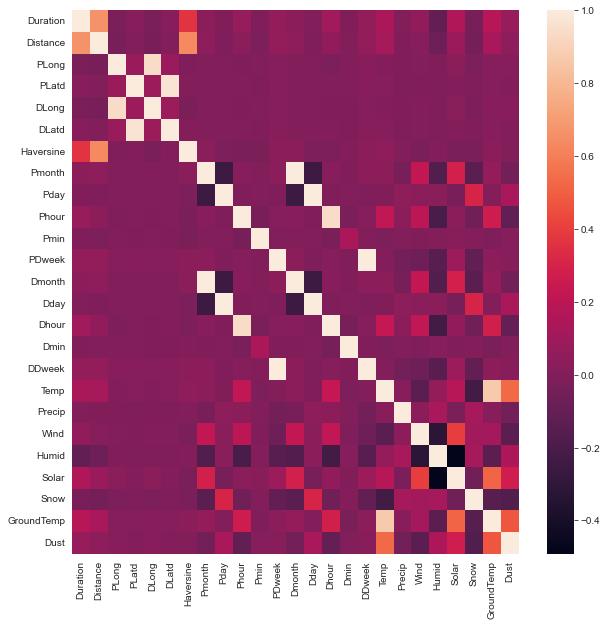

In [17]:
sns.heatmap(train_scaled.corr())


In [18]:
X = train_scaled[[i for i in project.columns if i != "Duration"]]
y = train_scaled["Duration"]
y.head()

0    0.008547
1    0.188034
2    0.051282
3    0.051282
4    0.017094
Name: Duration, dtype: float64

In [19]:
#Feature selection with Select KBest
from sklearn.feature_selection import SelectKBest,chi2, mutual_info_regression,f_regression
feats = SelectKBest(score_func = f_regression, k= 10)

In [20]:
feats.fit(X,y)
feats_scores = pd.Series(feats.scores_, index = [i for i in project.columns if i != "Duration"])
feats_scores.nlargest(10)

Distance      195624.897743
Haversine      38231.825022
GroundTemp      8293.025113
Solar           6261.950646
Temp            5193.953992
Humid           3151.169481
Dhour           2777.345025
Phour           1232.344193
Dust            1173.170402
PDweek           863.951242
dtype: float64

In [21]:
mutual_reg_feats = mutual_info_regression(X, y)
mutual_feats = pd.Series(mutual_reg_feats, index = [i for i in project.columns if i != "Duration"])
mutual_feats.sort_values(ascending = False)
mutual_feats.nlargest(10)

Haversine     0.847071
Distance      0.835125
DLong         0.152368
DLatd         0.149595
PLong         0.147927
PLatd         0.142577
Phour         0.034311
Dhour         0.033401
GroundTemp    0.024292
Temp          0.021226
dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
Training1 = X[["Distance","Haversine","Dhour","Temp","Humid","DLatd","Wind","Solar","Dust"]]

X_train, X_test, y_train, y_test = train_test_split(Training1, y, test_size = 0.25, random_state = 10)
X_train.head()

,Distance,Haversine,Dhour,Temp,Humid,DLatd,Wind,Solar,Dust
12937,0.018630,0.022795,0.347826,0.407547,0.426829,0.462620,0.223881,0.00000,0.198795
27065,0.067608,0.070596,0.391304,0.471698,0.451220,0.335178,0.149254,0.00000,0.253012
57706,0.084736,0.111741,0.782609,0.377358,0.219512,0.683966,0.671642,0.00813,0.150602
10827,0.164663,0.226665,0.913043,0.573585,0.170732,0.320646,0.298507,0.00000,0.042169
168437,0.058293,0.053000,0.913043,0.596226,0.573171,0.148538,0.253731,0.00000,0.126506


In [23]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)

lin_pred_score = r2_score(y_test, lin_pred)
lin_pred_score

0.45915731750404365

In [24]:
# random Forest
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
radn_forst_model = RandomForestRegressor(n_estimators = 200, max_depth = 7, random_state = 10)
radn_forst_model.fit(X_train, y_train)
radn_forst_pred = radn_forst_model.predict(X_test)
radn_forst_pred_score = r2_score(y_test, radn_forst_pred)

In [25]:
radn_forst_pred_score

0.6299952423382575

In [27]:
!pip install xgboost
import xgboost as xgb

     ------------------------------------ 126.1/126.1 MB 271.3 kB/s eta 0:00:00


<AxesSubplot:>

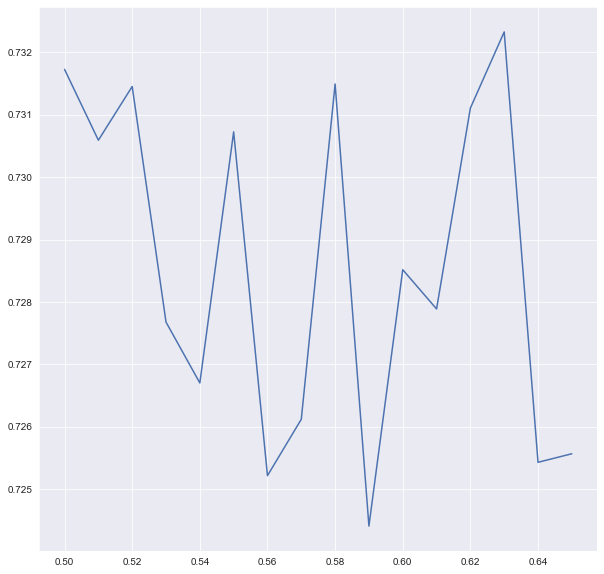

In [29]:
xgb_scores = []
for i in np.arange(0.5,0.65,0.01):
    xgboost = xgb.XGBRegressor(n_estimators = 100, learning_rate = i, random_state = 10)
    xgboost.fit(X_train, y_train)
    xgboost_pred = xgboost.predict(X_test)
    xgboost_score = r2_score(y_test, xgboost_pred)
    xgb_scores.append(xgboost_score)
    
sns.lineplot(x = np.arange(0.5,0.65,0.01), y = xgb_scores)

In [30]:
xgboost = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.61, random_state = 10)
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test)
xgboost_score = r2_score(y_test, xgboost_pred)
xgboost_score

0.7278891654636376